Visualization of MCMC images with t-SNE
===
In this workbook, I retrieve a set of MCMC samples from the previous exercise and use t-SNE to compare them with natural images pertaining to the same neural network.

In [3]:
import pickle
from sklearn.manifold import TSNE

In [4]:
import ggplot

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
f = open('/thesis/exp/data/mnist/mnist.pkl')
mnist = pickle.load(f)
f.close()

In [7]:
trn_img,trn_lbl = mnist[0]
tst_img,tst_lbl = mnist[1]
cvd_img,cvd_lbl = mnist[2]

In [8]:
print(trn_img.shape)

(50000, 784)


We will start by visualizing 2500 natural images from the MNIST training dataset.

In [9]:
N = 10000

In [10]:
images_vis = trn_img[:N,:]
labels_vis = trn_lbl[:N]

In [11]:
model2D = TSNE(n_components=2, random_state=0)

In [ ]:
#rep2D = model2D.fit_transform(images_vis)

In [12]:
f = open('tsne.pkl')
rep2D = pickle.load(f)
f.close()

In [13]:
rep2D.shape

(10000, 2)

In [69]:
colors = cm.get_cmap('jet',10)

In [70]:
colors(range(10))

array([[ 0.        ,  0.        ,  0.5       ,  1.        ],
       [ 0.        ,  0.        ,  1.        ,  1.        ],
       [ 0.        ,  0.38888889,  1.        ,  1.        ],
       [ 0.        ,  0.83333333,  1.        ,  1.        ],
       [ 0.3046595 ,  1.        ,  0.66308244,  1.        ],
       [ 0.66308244,  1.        ,  0.3046595 ,  1.        ],
       [ 1.        ,  0.90123457,  0.        ,  1.        ],
       [ 1.        ,  0.48971193,  0.        ,  1.        ],
       [ 1.        ,  0.0781893 ,  0.        ,  1.        ],
       [ 0.5       ,  0.        ,  0.        ,  1.        ]])

In [26]:
"{}".format(labels_vis)

'[5 0 4 ..., 6 9 7]'

In [57]:
labelgroups = [rep2D[labels_vis==i,:] for i in range(10)]

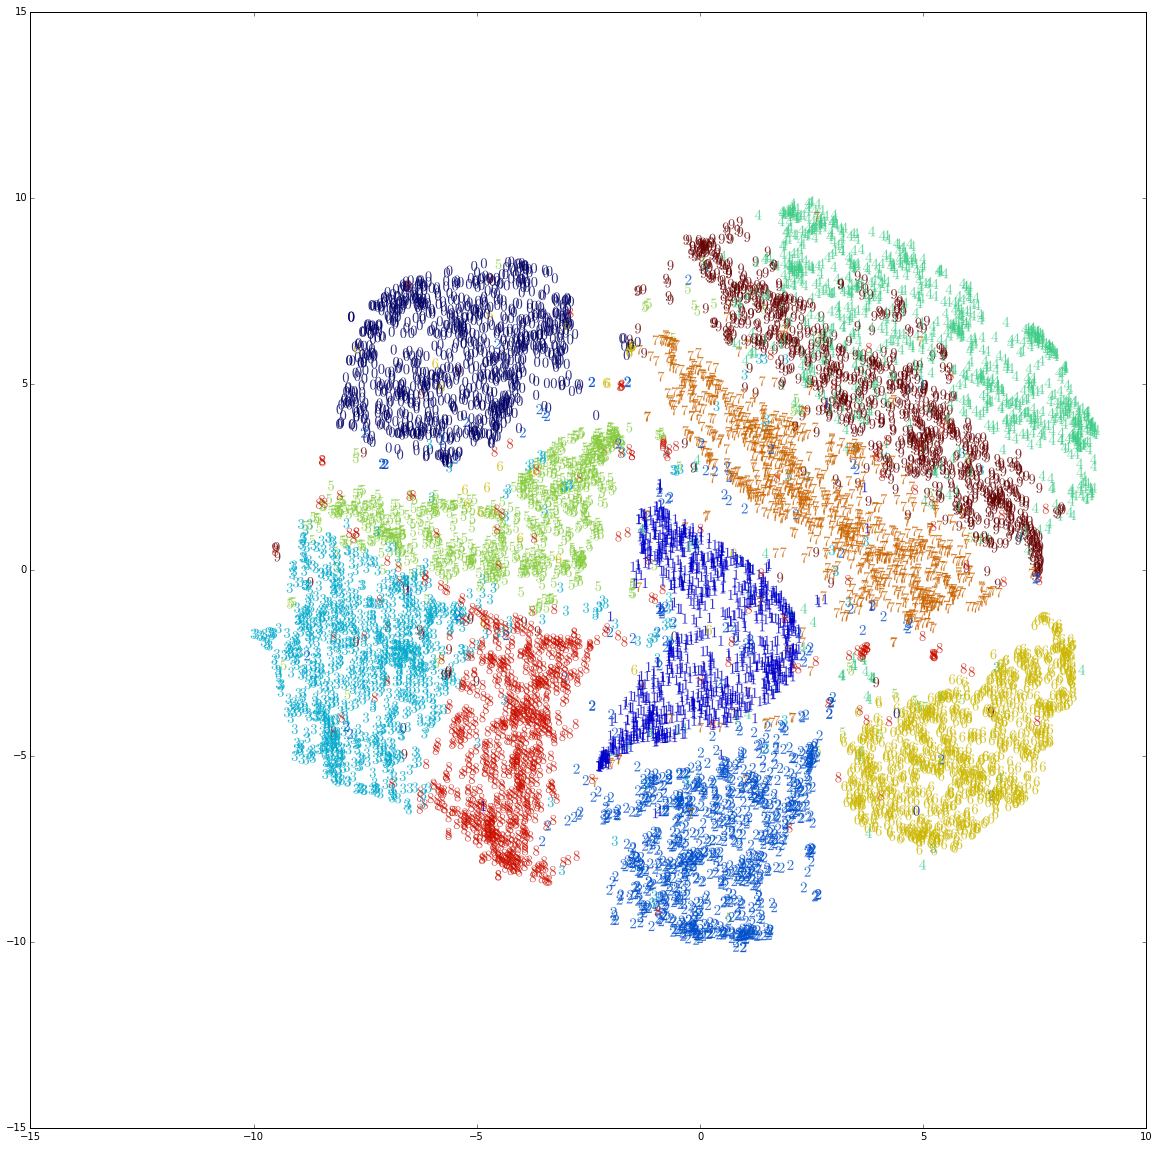

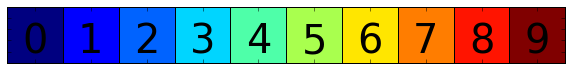

In [71]:
figure(figsize=(20,20))
for i in range(N):
    scatter(rep2D[i,0],rep2D[i,1],c=np.array(colors(labels_vis[i]))*0.8,
    marker=r"${}$".format(labels_vis[i]),s=100,alpha=0.8,edgecolors='none')
show()
figure(figsize=(10,1))
bar(left=range(10),height=np.ones(10),width=1,color=colors(range(10)))
xticks(arange(10)+0.5, range(10), fontsize=40,position=(0,0.8))
yticks(visible=False);

---

Now let's see what happens when we run t-SNE on both our natural images and our MCMC samples.

In [50]:
X = pickle.load(open('/thesis/exp/output/mnist_MCMC_samples.pkl','rb'))

In [54]:
X = [A.reshape([1000,784]) for A in X]

In [56]:
X = np.concatenate(X)

In [61]:
N = X.shape[0]

In [59]:
images_vis_all = np.concatenate((images_vis,X),0)

In [64]:
L = np.repeat(arange(10),N/10)

In [70]:
labels_vis_all = np.concatenate((labels_vis,L),0)

In [67]:
model2D_all = TSNE(n_components=2, random_state=0)

In [68]:
rep2D = model2D.fit_transform(images_vis_all)

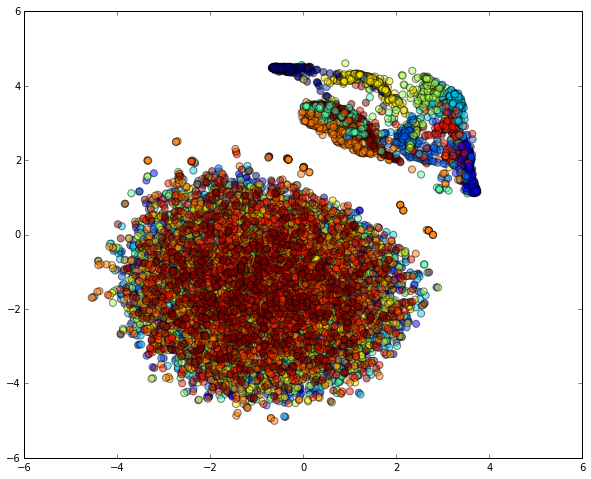

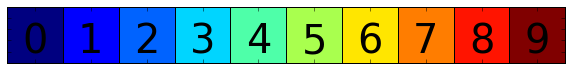

In [72]:
figure(figsize=(10,8))
scatter(rep2D[:,0],rep2D[:,1],c=labels_vis_all,cmap=colors,marker=u'o',s=50,alpha=0.5)
show()
figure(figsize=(10,1))
bar(left=range(10),height=np.ones(10),width=1,color=colors(range(10)))
xticks(arange(10)+0.5, range(10), fontsize=40,position=(0,0.8))
yticks(visible=False);

Right off the bat, we can see an issue: the MCMC samples appear to be mixed together into an amorphous blob that is distinct from the tidy clusters of our natural images.

This makes sense given the problem previously identified: our MCMC is often as not finding "good noise" that is marginally better than pure noise but does not approximate anything like a natural image.